# Random Forest Algorithm

Random Forest is an advanced machine learning algorithm for predictive analytics. Random Forest combines multiple decision trees to create an additive learning model from the sequence of base models created by each decision tree that worked on a sub-sample dataset. Random Forest models are suitable to handle tabular datasets with hundreds of numeric and categorical features. Along with missing values, non-linear relations between features and the target, will be handled well by random forest algorithms. With proper tuning of the hyper-parameters of the random forest algorithm, it can perform well with decent accuracy in the predictions without overfitting the model. Unlike similar regression models, it does not offer feature coefficient information but it providesfeature ranking functionality very nicely. 

In [1]:
import os
import numpy as np 
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [2]:

print(os.getcwd())
print("")

train = pd.read_csv("../data/train_after_feature_engineering.csv")
test = pd.read_csv("../data/test_after_feature_engineering.csv")

print ('The train data has {0} rows and {1} columns'.format(train.shape[0],train.shape[1]))    
print ('The test data has {0} rows and {1} columns'.format(test.shape[0],test.shape[1]))


/home/mcheruvu/git/hid306/project/code

The train data has 1460 rows and 307 columns
The test data has 1459 rows and 306 columns


In [3]:
np.random.seed(1234)

_random_forest_algo = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=123456)

# Fit the Model

In [4]:
target_vector = train["SalePrice"]
target_vector = np.log1p(target_vector) # log(SalePrice) + 1

train.drop(['SalePrice'], axis=1, inplace=True)


model = _random_forest_algo.fit(train, target_vector)    
    

# Feature Ranking

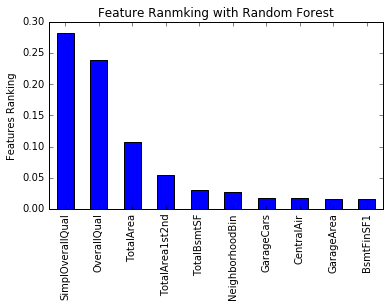

In [11]:
#top 10 features
feat_imp = pd.Series(_random_forest_algo.feature_importances_, train.columns).sort_values(ascending=False)
feat_imp[:10].plot(kind='bar', title='Feature Ranmking with Random Forest', figsize=(6,4))
plt.ylabel('Feature Importance values')
plt.subplots_adjust(bottom=0.25)
plt.ylabel('Features Ranking')

plot = plt.gcf()
plot.savefig("../images/random_forest_feature_ranking.pdf", bbox_inches='tight')


# Predict the Test Sale Price

In [24]:
y_train = target_vector
y_train_pred = _random_forest_algo.predict(train)
    
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))

print("Random Forest score on training set: ", rmse_train)

y_test_pred = _random_forest_algo.predict(test)

print(y_test_pred[5:])

('Random Forest score on training set: ', 0.051904330445822787)
[ 12.12575038  12.01663116  12.08182459 ...,  11.94843802  11.67941795
  12.35900299]


# Save Predictions

In [25]:
df_predict = pd.DataFrame({'Id': test["Id"], 'SalePrice': np.exp(y_test_pred) - 1.0})
#df_predict = pd.DataFrame({'Id': id_vector, 'SalePrice': sale_price_vector})

df_predict.to_csv('../data/kaggle_python_random_forest.csv', header=True, index=False)

print("...file is saved")

...file is saved
